In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error # Librería para calcular el MSE
from sklearn.metrics import mean_absolute_error # Librería para calcular el MAE
from sklearn.tree import DecisionTreeClassifier, plot_tree # Trabajo con árboles y visualización

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from google.colab import files


In [ ]:
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
# file_path = 'My Drive/MachineLearning/Titanic-Dataset.csv'
#file_path = 'Mi unidad/MachineLearning/Titanic-Dataset.csv'
#df = pd.read_csv(file_path)
df = pd.read_csv('Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# df.dropna()
df['Age'] = df['Age'].mean()
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna('Unknown')
#df.isnull().sum()

In [ ]:
# Se convierten a numéricas las categorías string
df_encoded = pd.get_dummies(df, columns=['Sex', 'Cabin'], drop_first=True)
df_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown
0,1,0,3,"Braund, Mr. Owen Harris",29.699118,1,0,A/5 21171,7.2500,S,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",29.699118,1,0,PC 17599,71.2833,C,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",29.699118,0,0,STON/O2. 3101282,7.9250,S,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",29.699118,1,0,113803,53.1000,S,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",29.699118,0,0,373450,8.0500,S,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Se eliminan del dataset las categorías que no se tendrán en cuenta para el modelo
X = df_encoded.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Embarked','Fare'], axis=1)
y = df_encoded['Survived']
X.head()

,Pclass,Age,SibSp,Parch,Sex_male,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown
0,3,29.699118,1,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,29.699118,1,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,29.699118,0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,29.699118,1,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,29.699118,0,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Divide los datos en un conjunto de entrenamiento y otro de prueba (80%/20% o 70%/30%) usando train_test_split de scikit-learn .
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Fase 3: Implementación Básica del Árbol de Decisión**

Instrucciones:
1. Entrenar el modelo:
Usa DecisionTreeClassifier o DecisionTreeRegressor de scikit-learn para
entrenar el árbol de decisión con los datos de entrenamiento.

In [ ]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
# Realiza predicciones sobre los datos de prueba
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0])

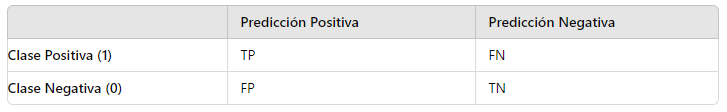

In [ ]:
# Evalúa el rendimiento del modelo:
# Para clasificación, utiliza métricas como precision y matriz de confusión.

accuracy = accuracy_score(y_test, y_pred) # Proporción de predicciones correctas
precision = precision_score(y_test, y_pred, pos_label=1) # mide la proporción de verdaderos positivos (TP) entre todos los casos que el modelo ha predicho como positivos (TP + FP).
recall = recall_score(y_test, y_pred, pos_label=1) # La sensibilidad o recall (también conocida como tasa de verdaderos positivos) mide la proporción de verdaderos positivos (TP) entre todos los casos que en realidad son positivos (TP + FN). Indica cuán bien el modelo es capaz de identificar los verdaderos positivos.

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label=1)

In [ ]:
print(f'Precisión (Accuracy): {accuracy:.2f}')
print(f'Precisión (Precision): {precision:.2f}')
print(f'Sensibilidad (Recall): {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precisión (Accuracy): 0.80
Precisión (Precision): 0.85
Sensibilidad (Recall): 0.64
F1-Score: 0.73


In [ ]:
print('Matriz de Confusión:')
print(cm)

Matriz de Confusión:
[[144  13]
 [ 40  71]]


Error cuadrático medio: 0.22
Error absoluto medio: 0.22

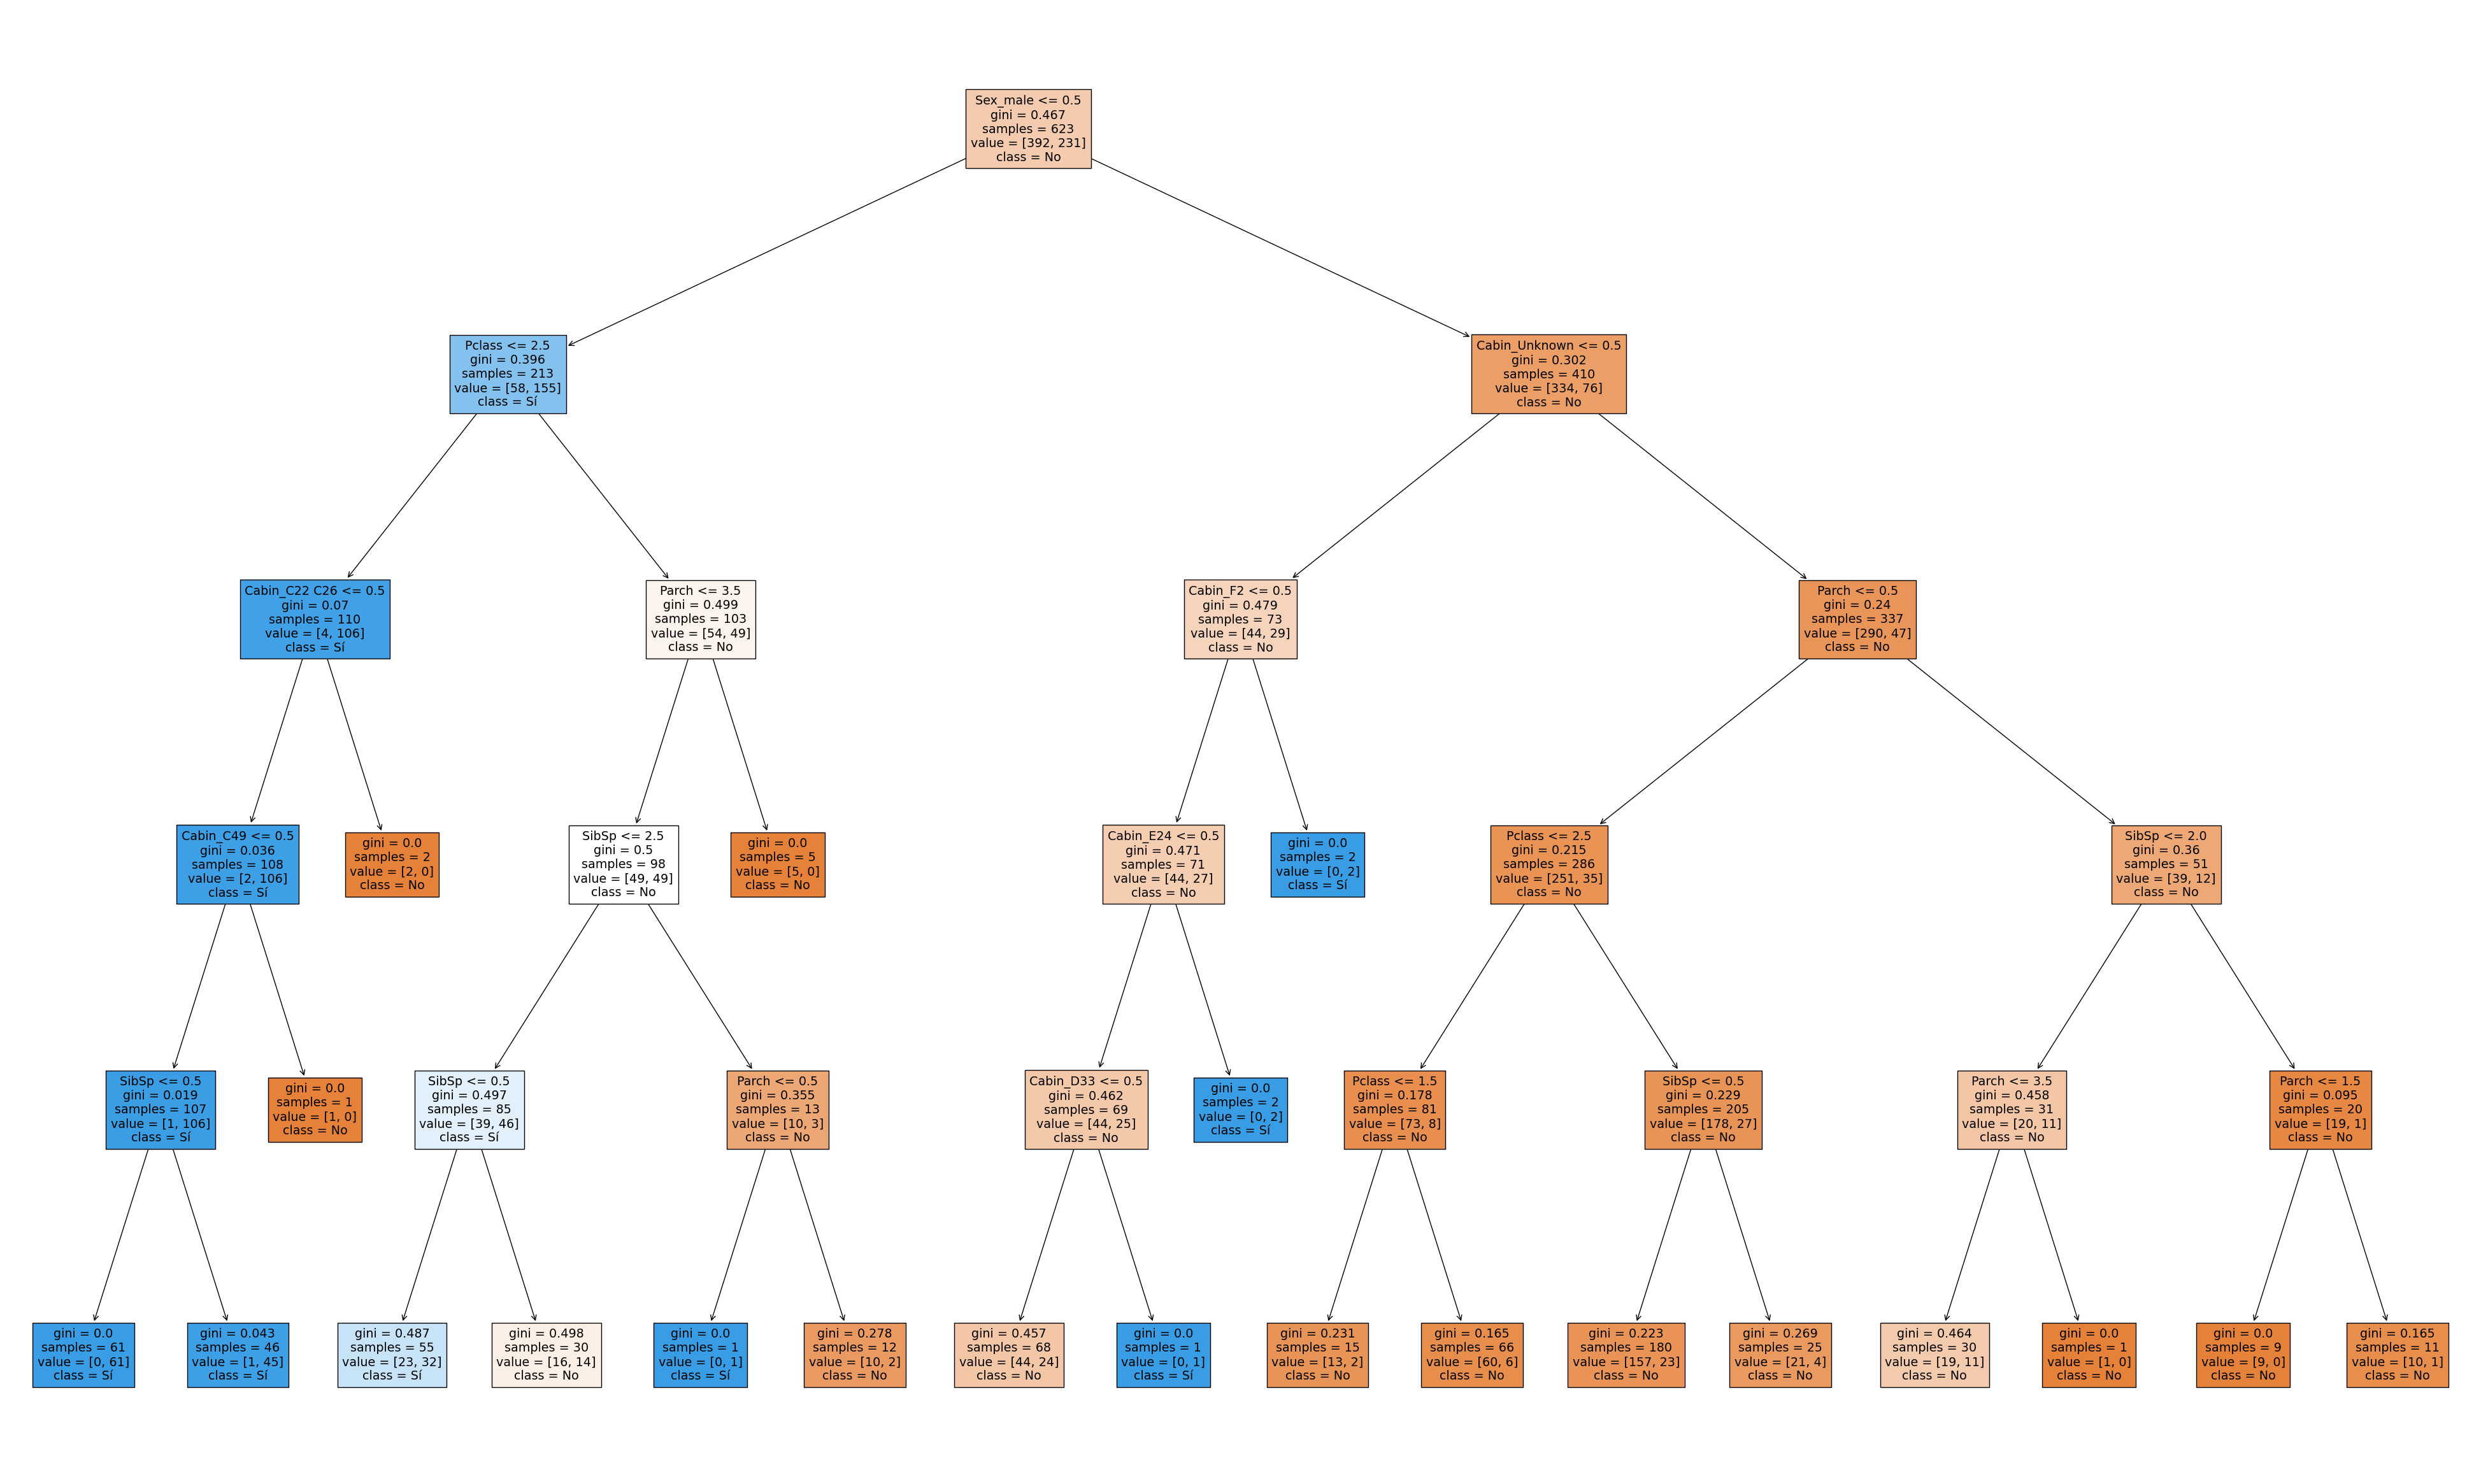

In [ ]:
plt.figure(figsize=(50,30))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Sí'], filled=True)
plt.show()

In [ ]:
# Dataframe con resultados con árbol de decisión
results_arbol_df = pd.DataFrame({
    'DatosPrueba': y_test,
    'DatosPredicción': y_pred
})

# results_arbol_df

# Modelo KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print("Matriz de Confusión con KNN \n", cm_knn)
print("Matriz de Confusión con Árbol de decisión: \n",cm)

Matriz de Confusión:
Matriz de Confusión con KNN 
 [[134  23]
 [ 40  71]]
Matriz de Confusión con Árbol de decisión: 
 [[144  13]
 [ 45  66]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy): {accuracy:.2f}")

Precisión (Accuracy): 0.76


In [ ]:
# Dataframe con resultados KNN
results_df = pd.DataFrame({
    'True Labels': y_test,
    'Predicted Labels': y_pred
})

results_df

,True Labels,Predicted Labels
709,1,1
439,0,0
840,0,0
720,1,0
39,1,1
...,...,...
821,1,0
633,0,0
456,0,0
500,0,0


# Taller Validación Cruzada y Métricas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

true_counts = results_arbol_df['DatosPrueba'].value_counts()
pred_counts = results_arbol_df['DatosPredicción'].value_counts()

print(true_counts)
print(pred_counts)

DatosPrueba
0    157
1    111
Name: count, dtype: int64
DatosPredicción
0    184
1     84
Name: count, dtype: int64


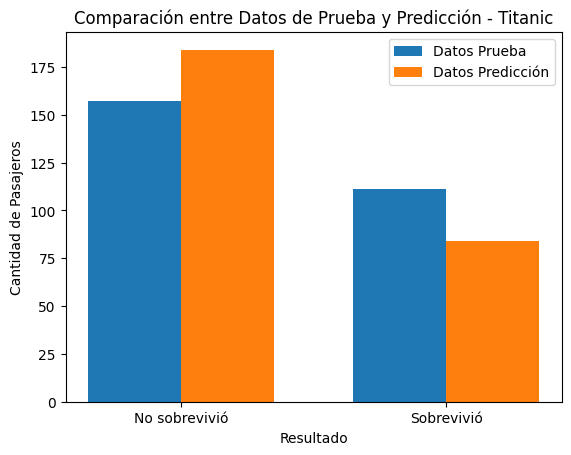

In [ ]:
# Definir etiquetas
etiquetas = ['No sobrevivió', 'Sobrevivió']

# Posiciones en el eje x
x = np.arange(len(etiquetas))
ancho_barra = 0.35  # Ancho de las barras

# Crear gráfico de barras para los valores de prueba
plt.bar(x - ancho_barra/2, true_counts, ancho_barra, label='Datos Prueba')

# Crear gráfico de barras para los valores de predicción
plt.bar(x + ancho_barra/2, pred_counts, ancho_barra, label='Datos Predicción')

# Añadir etiquetas y título
plt.xlabel('Resultado')
plt.ylabel('Cantidad de Pasajeros')
plt.title('Comparación entre Datos de Prueba y Predicción - Titanic')
plt.xticks(x, etiquetas)
plt.legend()

# Mostrar gráfico
plt.show()

# Aplicación Validación StratifiedKFold

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

In [ ]:
precisions, recalls, f1_scores = [], [], []

In [ ]:
# Ciclo para entrenar y evaluar
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

In [ ]:
print(f"Precisión promedio: {sum(precisions) / len(precisions)}")
print(f"Sensibilidad promedio: {sum(recalls) / len(recalls)}")
print(f"F1 Score promedio: {sum(f1_scores) / len(f1_scores)}")

Precisión promedio: 0.791805343289324
Sensibilidad promedio: 0.7923733601154981
F1 Score promedio: 0.7867524034868847


# Aplicación Validación KFold

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

In [ ]:
k = 5

kf = KFold(n_splits=k, shuffle=True, random_state=42)


accuracy_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(clf, X, y, cv=kf, scoring=make_scorer(precision_score, average='weighted'))
recall_scores = cross_val_score(clf, X, y, cv=kf, scoring=make_scorer(recall_score, average='weighted'))
f1_scores = cross_val_score(clf, X, y, cv=kf, scoring=make_scorer(f1_score, average='weighted'))

print(f"Exactitud promedio: {accuracy_scores.mean()}")
print(f"Precisión promedio: {precision_scores.mean()}")
print(f"Sensibilidad promedio: {recall_scores.mean()}")
print(f"F1 Score promedio: {f1_scores.mean()}")

Exactitud promedio: 0.8047203565375683
Precisión promedio: 0.8027981356838152
Sensibilidad promedio: 0.8047203565375683
F1 Score promedio: 0.7969067287319498


# Aplicación Validación LeavePOut

In [ ]:
from sklearn.model_selection import LeavePOut
import warnings

warnings.filterwarnings("ignore")

In [ ]:
p = 5
lpo = LeavePOut(p=p)

In [ ]:
precisions, recalls, f1_scores = [], [], []

for train_index, test_index in lpo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

print(f"Precisión promedio: {sum(precisions) / len(precisions)}")
print(f"Sensibilidad promedio: {sum(recalls) / len(recalls)}")
print(f"F1 Score promedio: {sum(f1_scores) / len(f1_scores)}")

KeyboardInterrupt: 

# Aplicación Métrica Leave one out

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")
loo = LeaveOneOut()


precisions, recalls, f1_scores = [], [], []


for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Taller 3 - Análisis de Curvas de Aprendizaje y Ajuste de Hiperparámetros

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
results_arbol_df

,DatosPrueba,DatosPredicción
709,1,1
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
821,1,0
633,0,0
456,0,0
500,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Definimos la curva de aprendizaje
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy',
                                                           train_sizes=np.linspace(0.1, 1.0, 10))

    # Promedio de los scores de entrenamiento y validación
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    # Graficamos dentro de la función
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Precisión en Entrenamiento")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Precisión en Validación")
    plt.xlabel("Número de ejemplos de entrenamiento")
    plt.ylabel("Precisión")
    plt.title("Curva de Aprendizaje")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

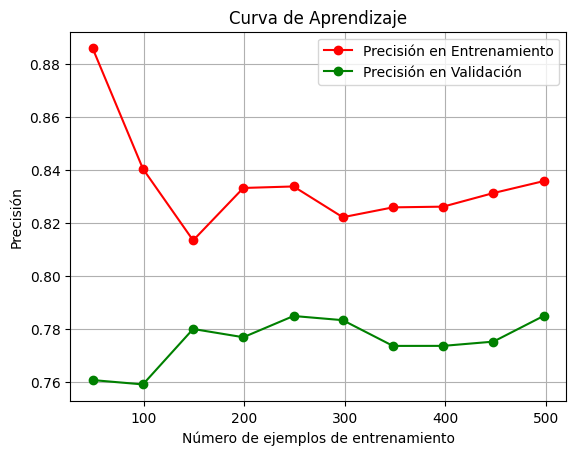

In [ ]:
# Aplicamos el modelo de Regresión Logística
modelo = LogisticRegression(solver='liblinear')
plot_learning_curve(modelo, X_train, y_train)

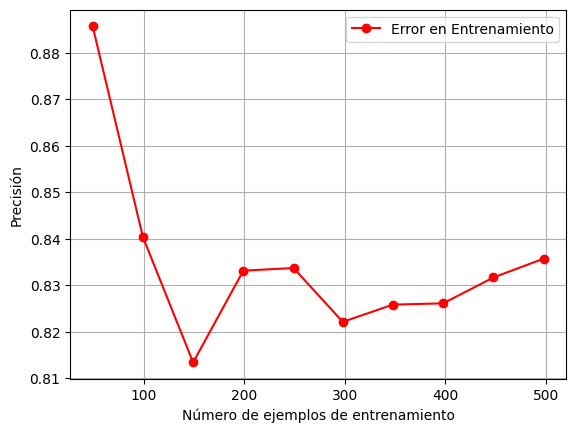

In [ ]:
# Función para graficar las curvas de aprendizaje
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy',
                                                           train_sizes=np.linspace(0.1, 1.0, 10))

    # Promedio de los scores de entrenamiento y validación
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    # Graficamos
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Error en Entrenamiento")

    plt.xlabel("Número de ejemplos de entrenamiento")
    plt.ylabel("Precisión")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Aplicamos el modelo de Regresión Logística
modelo = LogisticRegression()
plot_learning_curve(modelo, X_train, y_train)

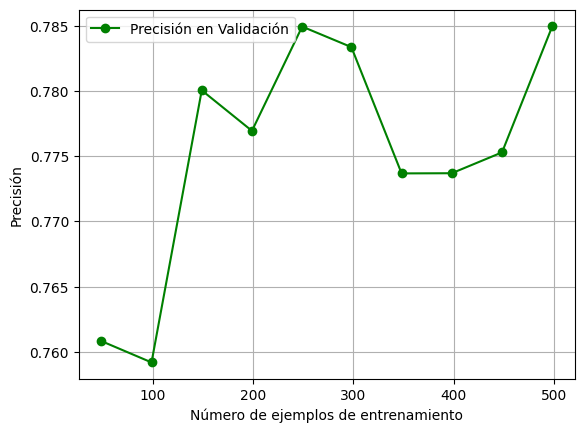

In [ ]:
# Función para graficar las curvas de aprendizaje
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy',
                                                           train_sizes=np.linspace(0.1, 1.0, 10))

    # Promedio de los scores de entrenamiento y validación
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    # Graficamos

    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Precisión en Validación")
    plt.xlabel("Número de ejemplos de entrenamiento")
    plt.ylabel("Precisión")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Aplicamos el modelo de Regresión Logística
modelo = LogisticRegression()
plot_learning_curve(modelo, X_train, y_train)


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definir el conjunto de hiperparámetros que queremos probar
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [ ]:
# Configurar el GridSearchCV para probar todas las combinaciones de hiperparámetros
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenar el GridSearchCV
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Hacer predicciones usando el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del mejor modelo: {accuracy}")

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Precisión del mejor modelo: 0.8022388059701493
